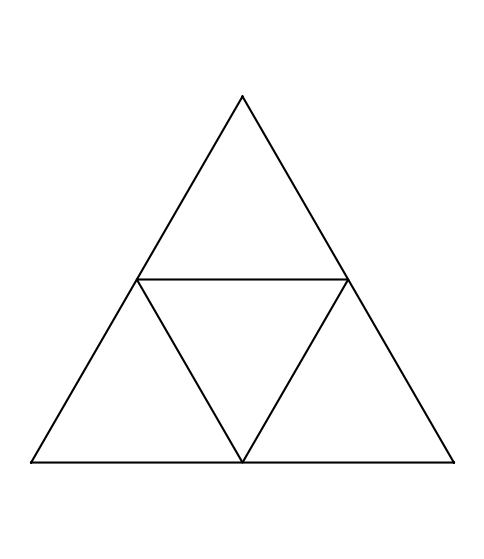

In [ ]:
# This code is for the Sierpinski graph construction and visualization

import matplotlib.pyplot as plt

def sierpinski_triangle(points, depth):
    if depth == 0:
        x = [p[0] for p in points] + [points[0][0]]
        y = [p[1] for p in points] + [points[0][1]]
        plt.plot(x, y, 'k')
    else:
        midpoints = [
            ((points[0][0] + points[1][0]) / 2, (points[0][1] + points[1][1]) / 2),
            ((points[1][0] + points[2][0]) / 2, (points[1][1] + points[2][1]) / 2),
            ((points[2][0] + points[0][0]) / 2, (points[2][1] + points[0][1]) / 2),
        ]
        sierpinski_triangle([points[0], midpoints[0], midpoints[2]], depth - 1)
        sierpinski_triangle([points[1], midpoints[0], midpoints[1]], depth - 1)
        sierpinski_triangle([points[2], midpoints[1], midpoints[2]], depth - 1)

# Define vertices of initial large triangle
points = [[0, 0], [1, 0], [0.5, 0.866]]

plt.figure(figsize=(6, 7))
sierpinski_triangle(points, 1)
plt.axis('equal')
plt.axis('off')
plt.show()

#depth starts from 0